In [2]:
import pandas as pd
data=pd.read_csv("Breast_cancer_data.csv")

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.shape

(569, 6)

In [5]:
data["diagnosis"].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [11]:
Y=data["diagnosis"]
X=data.drop("diagnosis",axis=1)

In [12]:
X.shape

(569, 5)

In [13]:
X.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


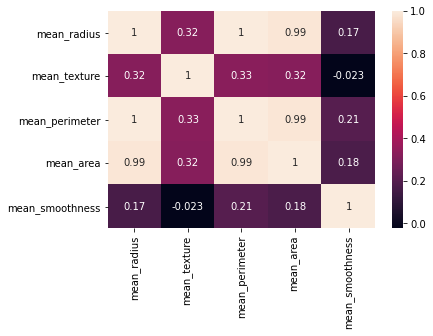

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(X.corr(),annot=True)

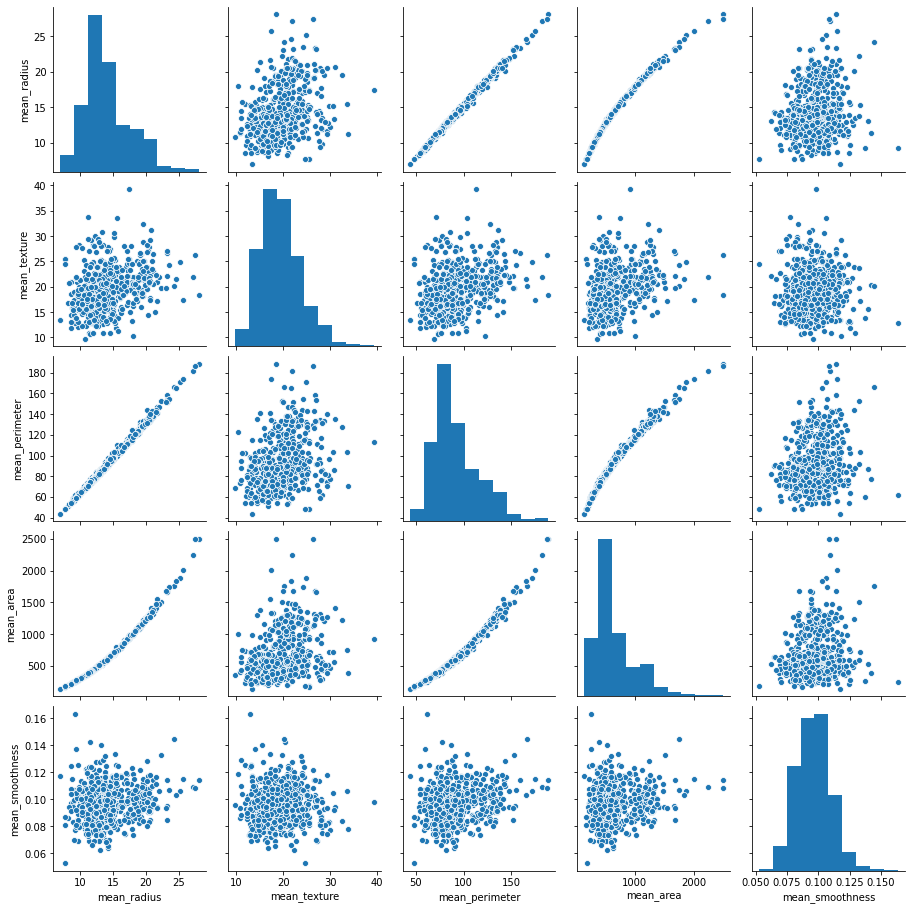

In [15]:
sns.pairplot(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
from sklearn.tree import DecisionTreeClassifier
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

depths=[1,5,50,100,150,250]
samples=[5, 10,50, 100,250, 500]

clf = DecisionTreeClassifier()

params = {'max_depth' : depths,
         "min_samples_split":samples}

grid = GridSearchCV(estimator = clf,param_grid=params ,cv = 3,n_jobs = 3,scoring='roc_auc')
grid.fit(X_train, y_train)
print("best depth = ", grid.best_params_)
print("AUC value on train data = ", grid.best_score_*100)
a = grid.best_params_

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
best depth =  {'max_depth': 5, 'min_samples_split': 100}
AUC value on train data =  92.07776781929854


In [19]:
optimal_depth = a.get('depth')
optimal_split=a.get("min_samples_split")

In [20]:
clf = DecisionTreeClassifier(max_depth=optimal_depth,min_samples_split=optimal_split) 

clf.fit(X_train,y_train)

pred = clf.predict(X_test)



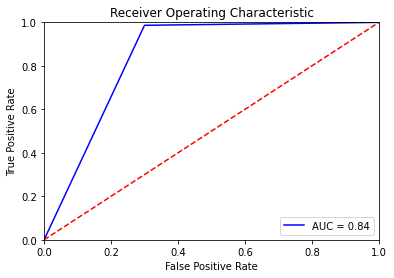

In [22]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

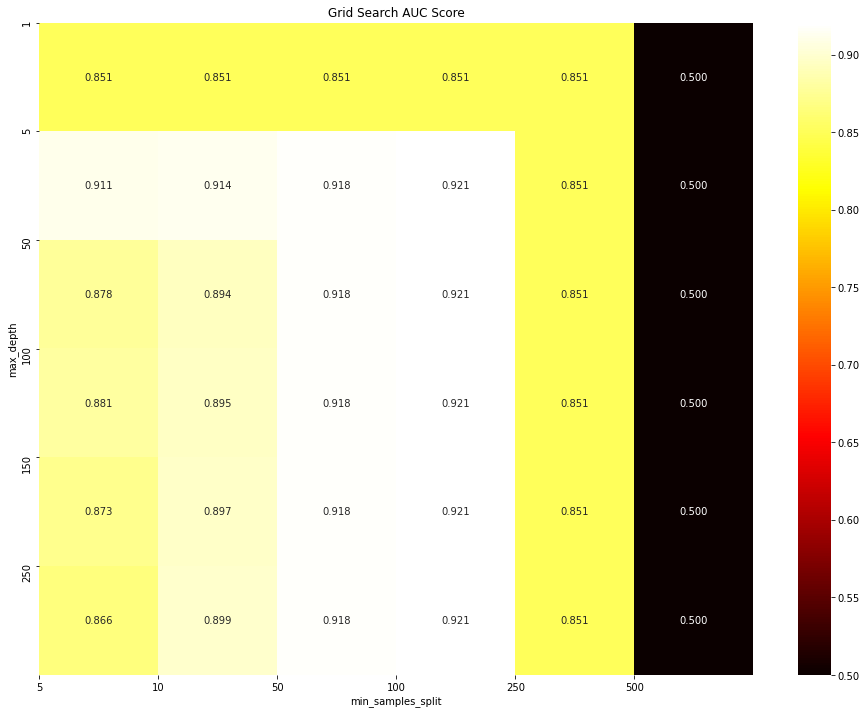

In [24]:
import numpy as np
scores = grid.cv_results_['mean_test_score'].reshape(len(samples),len(depths))

plt.figure(figsize=(16, 12))
sns.heatmap(scores, annot=True, cmap=plt.cm.hot, fmt=".3f", xticklabels=samples, yticklabels=depths)
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.xticks(np.arange(len(samples)), samples)
plt.yticks(np.arange(len(depths)), depths)
plt.title('Grid Search AUC Score')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
acc1 = accuracy_score(y_test, pred) * 100
pre1 = precision_score(y_test, pred) * 100
rec1 = recall_score(y_test, pred) * 100
f11 = f1_score(y_test, pred) * 100
print('\nAccuracy=%f%%' % (acc1))
print('\nprecision=%f%%' % (pre1))
print('\nrecall=%f%%' % (rec1))
print('\nF1-Score=%f%%' % (f11))


Accuracy=88.596491%

precision=85.882353%

recall=98.648649%

F1-Score=91.823899%


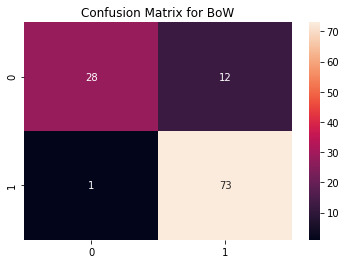

In [26]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.title('Confusion Matrix for BoW')
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(max_depth=2,min_samples_split=3)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.07470
Feature: 3, Score: 0.89278
Feature: 4, Score: 0.03252


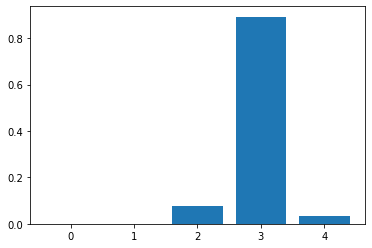

In [31]:
from matplotlib import pyplot
importance =dtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

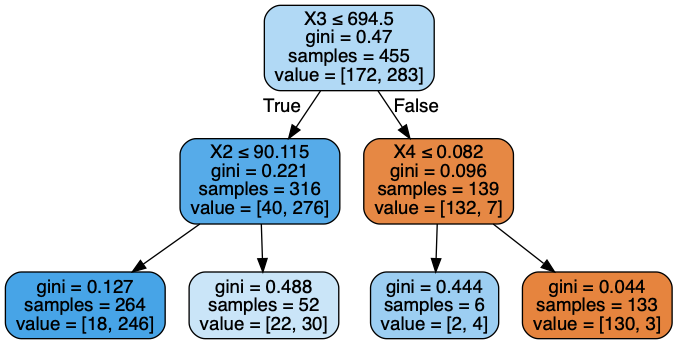

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())